In [1]:
#workshop 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
sb.set()

cols = ['preg', 'plas', 'pres', 'skin', 'insu', 'bmi', 'pedi', 'age', 'class']
df = pd.read_csv('/Users/apple/Desktop/my_machine_learning/csv/pima-indians-diabetes.csv', names=cols)
df.head()

preg  plas  pres  skin  insu   bmi   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1

In [6]:
df.isnull().sum()

preg     0
plas     0
pres     0
skin     0
insu     0
bmi      0
pedi     0
age      0
class    0
dtype: int64

In [7]:
df.describe().round(2)

preg    plas    pres    skin    insu     bmi    pedi     age   class
count  768.00  768.00  768.00  768.00  768.00  768.00  768.00  768.00  768.00
mean     3.85  120.89   69.11   20.54   79.80   31.99    0.47   33.24    0.35
std      3.37   31.97   19.36   15.95  115.24    7.88    0.33   11.76    0.48
min      0.00    0.00    0.00    0.00    0.00    0.00    0.08   21.00    0.00
25%      1.00   99.00   62.00    0.00    0.00   27.30    0.24   24.00    0.00
50%      3.00  117.00   72.00   23.00   30.50   32.00    0.37   29.00    0.00
75%      6.00  140.25   80.00   32.00  127.25   36.60    0.63   41.00    1.00
max     17.00  199.00  122.00   99.00  846.00   67.10    2.42   81.00    1.00

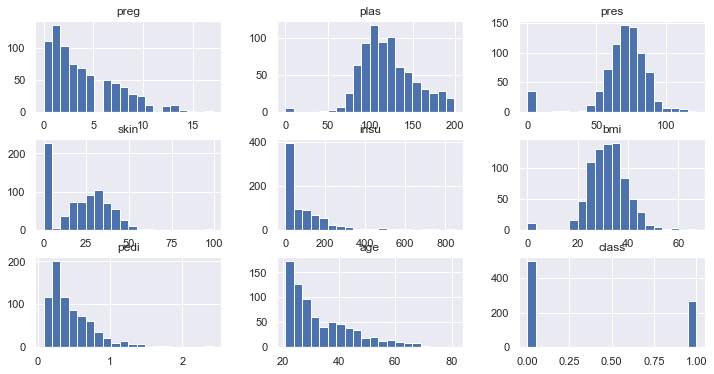

In [8]:
df.hist(bins=20, figsize=(12, 6))
plt.show()

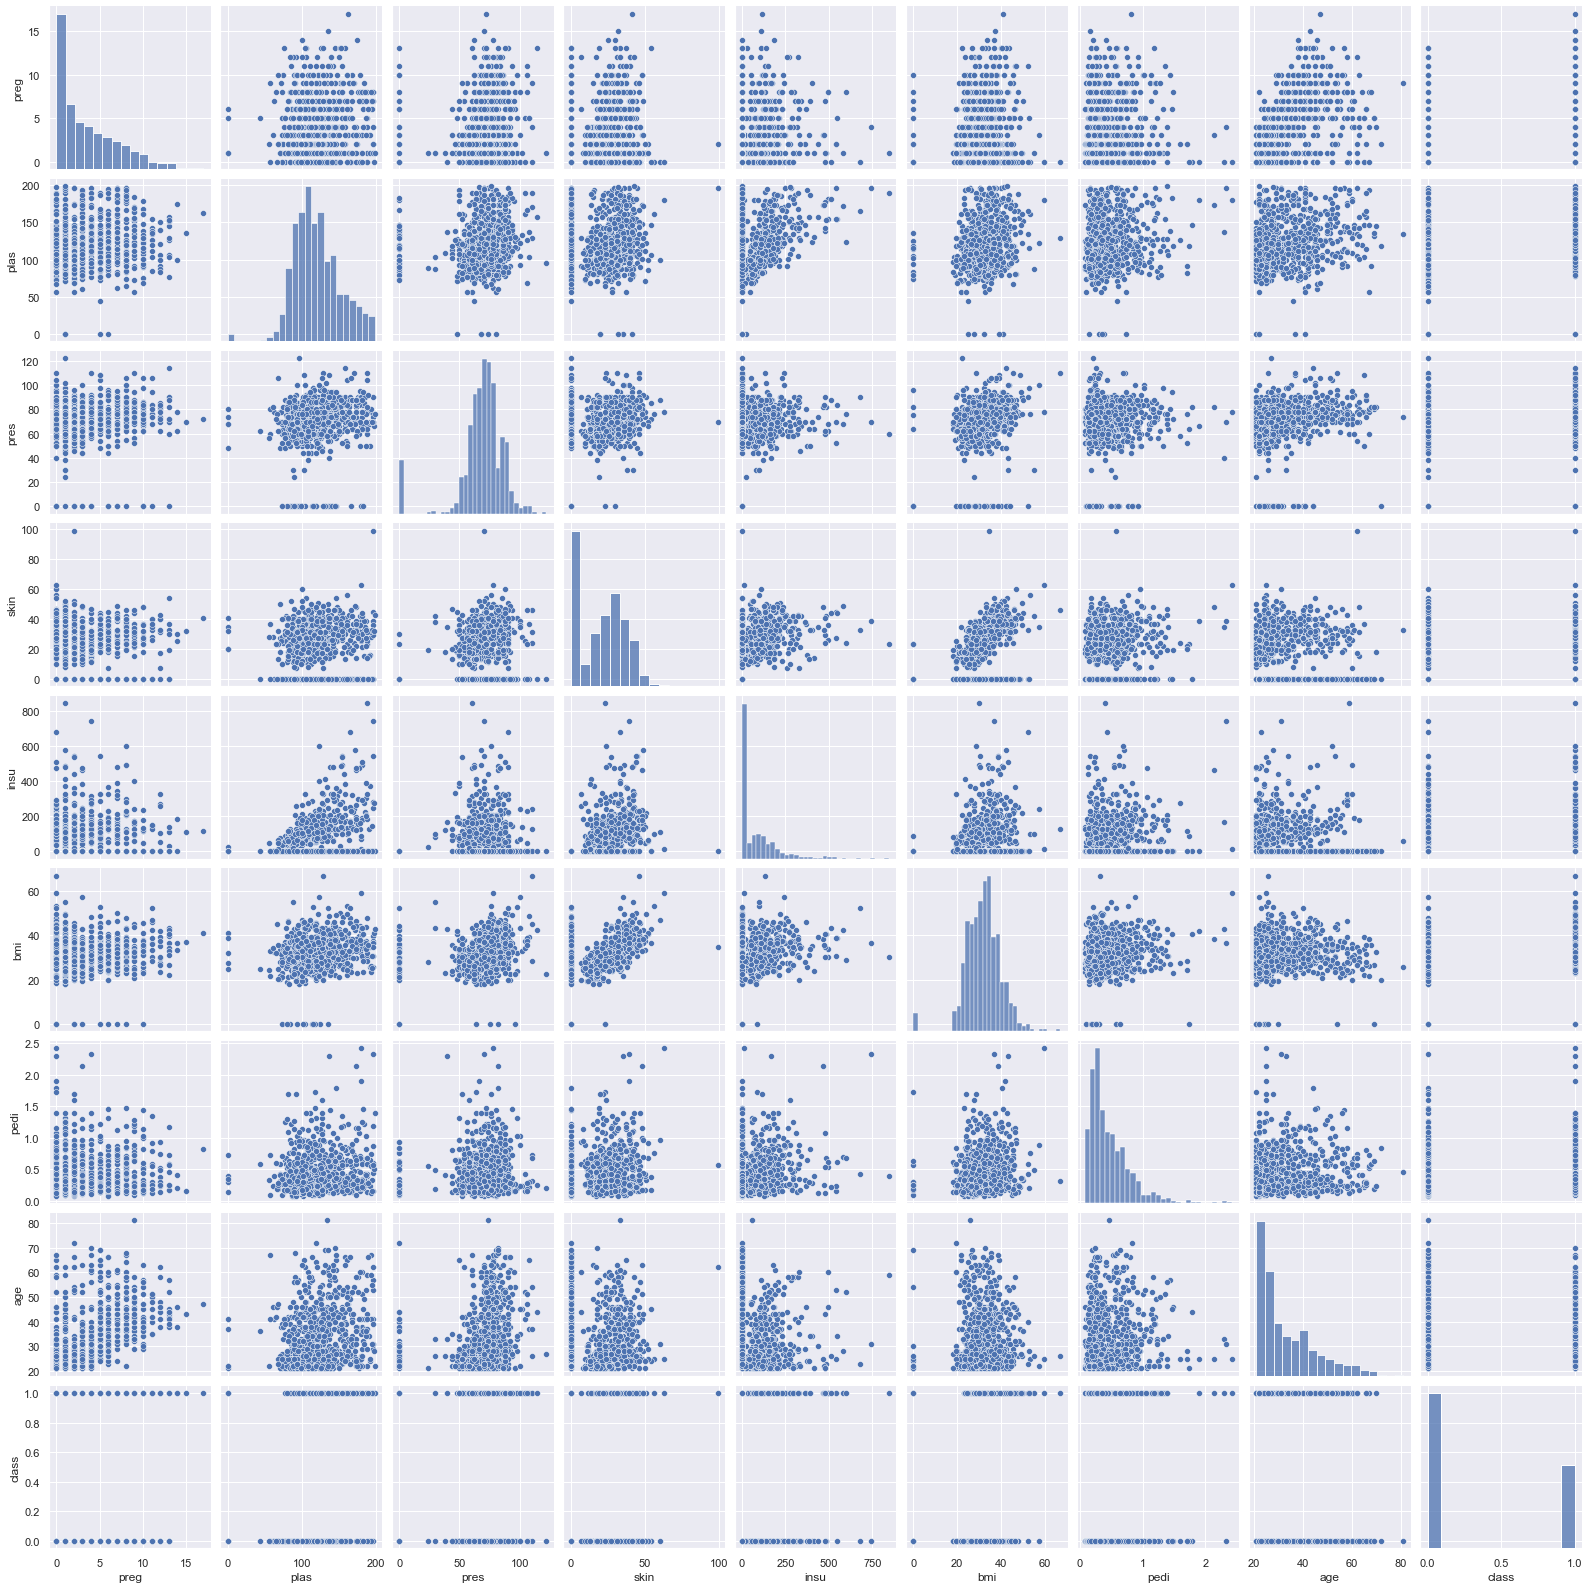

In [9]:
sb.pairplot(df)
plt.show()

/Users/apple/opt/anaconda3/envs/opencv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


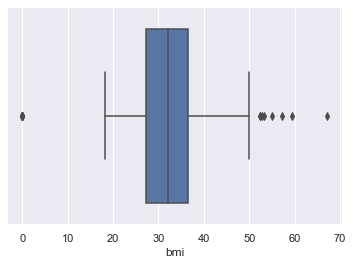

In [10]:
sb.boxplot(df['bmi'])
plt.show()

In [13]:
bmi_zero = df['bmi'][df['bmi'] == 0].count()
bmi_zero

11

In [14]:
print('{:.2f}'.format(bmi_zero / df.shape[0]*100))

1.43


In [16]:
df['bmi'] = df['bmi'].replace(0, df['bmi'].mean())
df.sample(10)

preg  plas  pres  skin  insu   bmi   pedi  age  class
477     7   114    76    17   110  23.8  0.466   31      0
157     1   109    56    21   135  25.2  0.833   23      0
78      0   131     0     0     0  43.2  0.270   26      1
261     3   141     0     0     0  30.0  0.761   27      1
425     4   184    78    39   277  37.0  0.264   31      1
193    11   135     0     0     0  52.3  0.578   40      1
736     0   126    86    27   120  27.4  0.515   21      0
312     2   155    74    17    96  26.6  0.433   27      1
313     3   113    50    10    85  29.5  0.626   25      0
490     2    83    65    28    66  36.8  0.629   24      0

In [22]:
def chk_zero(cl):
    zero = df[cl][df[cl] == 0].count()
    print('{:5}  {:5}  {:7.2f} %'.format(cl, zero, zero / df.shape[0] * 100))
print('Zero count: \n-----------------------')
for col in df.columns:
    chk_zero(col)

Zero count: 
-----------------------
preg     111    14.45 %
plas       5     0.65 %
pres      35     4.56 %
skin     227    29.56 %
insu     374    48.70 %
bmi        0     0.00 %
pedi       0     0.00 %
age        0     0.00 %
class    500    65.10 %


In [23]:
df.drop('insu', axis=1, inplace=True)

In [24]:
df.describe().round(2)

preg    plas    pres    skin     bmi    pedi     age   class
count  768.00  768.00  768.00  768.00  768.00  768.00  768.00  768.00
mean     3.85  120.89   69.11   20.54   32.45    0.47   33.24    0.35
std      3.37   31.97   19.36   15.95    6.88    0.33   11.76    0.48
min      0.00    0.00    0.00    0.00   18.20    0.08   21.00    0.00
25%      1.00   99.00   62.00    0.00   27.50    0.24   24.00    0.00
50%      3.00  117.00   72.00   23.00   32.00    0.37   29.00    0.00
75%      6.00  140.25   80.00   32.00   36.60    0.63   41.00    1.00
max     17.00  199.00  122.00   99.00   67.10    2.42   81.00    1.00

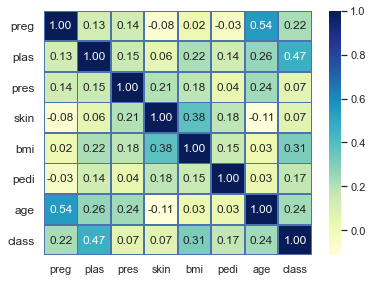

In [27]:
plt.figure(figsize=(6, 4.5))
cor = df.corr()
g = sb.heatmap(cor, annot=True, cmap='YlGnBu', linewidths=0.8, linecolor='b', fmt='.2f')
g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)
plt.show()

In [29]:
cols_fts = ['preg', 'plas', 'bmi', 'pedi', 'age']
X = df[cols_fts].copy()
X

preg  plas   bmi   pedi  age
0       6   148  33.6  0.627   50
1       1    85  26.6  0.351   31
2       8   183  23.3  0.672   32
3       1    89  28.1  0.167   21
4       0   137  43.1  2.288   33
..    ...   ...   ...    ...  ...
763    10   101  32.9  0.171   63
764     2   122  36.8  0.340   27
765     5   121  26.2  0.245   30
766     1   126  30.1  0.349   47
767     1    93  30.4  0.315   23

[768 rows x 5 columns]

In [30]:
X['test'] = df['age'] * .7 - df['pedi'] * 9
X.head()

preg  plas   bmi   pedi  age    test
0     6   148  33.6  0.627   50  29.357
1     1    85  26.6  0.351   31  18.541
2     8   183  23.3  0.672   32  16.352
3     1    89  28.1  0.167   21  13.197
4     0   137  43.1  2.288   33   2.508

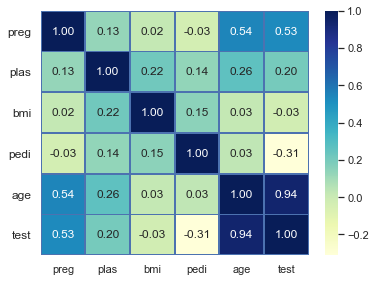

In [31]:
plt.figure(figsize=(6, 4.5))
cor = X.corr()
g = sb.heatmap(cor, annot=True, cmap='YlGnBu', linewidths=0.8, linecolor='b', fmt='.2f')
g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)
plt.show()

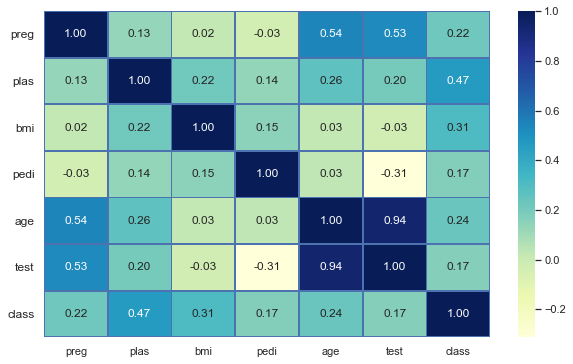

In [34]:
X2 = X.copy()
X2['class'] = df['class']
plt.figure(figsize=(10, 6))
cor = X2.corr()
g = sb.heatmap(cor, annot=True, cmap='YlGnBu', linewidths=0.8, linecolor='b', fmt='.2f')
g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)
plt.show()

In [36]:
import warnings

In [37]:
warnings.filterwarnings('ignore')

In [38]:
from sklearn.preprocessing import MinMaxScaler as Scaler

In [39]:
X = df.drop('class', axis=1)
sc = Scaler()
X_sc = sc.fit_transform(X)

df_sc = pd.DataFrame(X_sc, columns=X.columns)
df_sc.head().round(3)

preg   plas   pres   skin    bmi   pedi    age
0  0.353  0.744  0.590  0.354  0.315  0.234  0.483
1  0.059  0.427  0.541  0.293  0.172  0.117  0.167
2  0.471  0.920  0.525  0.000  0.104  0.254  0.183
3  0.059  0.447  0.541  0.232  0.202  0.038  0.000
4  0.000  0.688  0.328  0.354  0.509  0.944  0.200

In [41]:
df_sc.var().sort_values(ascending=False).round(5) * 1000

preg    39.29
age     38.42
skin    25.96
plas    25.81
pres    25.17
pedi    20.01
bmi     19.77
dtype: float64